### Extract data from database

In [212]:
from tqdm import tqdm

import mariadb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Connection to server**

In [213]:
try:
    conn = mariadb.connect(
        user="guest",
        password="relational",
        host="relational.fit.cvut.cz",
        port=3306,
        database="ftp"
    )
except mariadb.Error as e:
    print(f"Error connecting to MariaDB Platform: {e}")
    sys.exit(1)

cur = conn.cursor()

**Converting from sql result to pandas DataFrame**

In [3]:
SQL_Query_session = pd.read_sql_query('''select * from session''', conn)
SQL_Query_product = pd.read_sql_query('''select * from product''', conn)

In [4]:
df_session = pd.DataFrame(SQL_Query_session)
df_product = pd.DataFrame(SQL_Query_product)

**Saving data in csv format**

In [5]:
df_session.to_csv(r'C:\Users\Tema\cinimex\task_1\data\raw\session_data.csv', index=False)
df_product.to_csv(r'C:\Users\Tema\cinimex\task_1\data\raw\product_data.csv', index=False)

In [6]:
df_session = pd.read_csv(r'C:\Users\Tema\cinimex\task_1\data\raw\session_data.csv')
df_product = pd.read_csv(r'C:\Users\Tema\cinimex\task_1\data\raw\product_data.csv')

In [7]:
df_general = df_product.merge(df_session, on='session_id', validate='many_to_one')

In [8]:
df_general['category_a'].value_counts().values

array([42801, 10877,  9448,  1096,   877,   574,   266,   200,   138,
         125,    89], dtype=int64)

**Review raw data**

In [9]:
df_general.head()

,session_id,sequence_order,category_a,category_b,category_c,category_d,start_time,end_time,gender
0,u10001,1,A00001,B00001,C00001,D00001,2014-11-14 00:02:14,2014-11-14 00:02:20,female
1,u10002,1,A00002,B00002,C00002,D24897,2014-12-12 14:12:05,2014-12-12 14:12:06,female
2,u10003,1,A00002,B00002,C00002,D00002,2014-11-14 00:02:41,2014-11-14 00:16:40,female
3,u10003,2,A00002,B00002,C00003,D00003,2014-11-14 00:02:41,2014-11-14 00:16:40,female
4,u10003,3,A00002,B00002,C00007,D00007,2014-11-14 00:02:41,2014-11-14 00:16:40,female


In [10]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66491 entries, 0 to 66490
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   session_id      66491 non-null  object
 1   sequence_order  66491 non-null  int64 
 2   category_a      66491 non-null  object
 3   category_b      66491 non-null  object
 4   category_c      66491 non-null  object
 5   category_d      66491 non-null  object
 6   start_time      66491 non-null  object
 7   end_time        66491 non-null  object
 8   gender          33455 non-null  object
dtypes: int64(1), object(8)
memory usage: 5.1+ MB


In [11]:
df_general.groupby('gender').count()

,session_id,sequence_order,category_a,category_b,category_c,category_d,start_time,end_time
gender,,,,,,,,
female,26384,26384,26384,26384,26384,26384,26384,26384
male,7071,7071,7071,7071,7071,7071,7071,7071


In [12]:
df_general['category_a'].nunique()

11

## Processing data

*-select essential columns*

*-create new features*

In [13]:
df_gen_train = df_general.dropna()

In [14]:
df_gen_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33455 entries, 0 to 33454
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   session_id      33455 non-null  object
 1   sequence_order  33455 non-null  int64 
 2   category_a      33455 non-null  object
 3   category_b      33455 non-null  object
 4   category_c      33455 non-null  object
 5   category_d      33455 non-null  object
 6   start_time      33455 non-null  object
 7   end_time        33455 non-null  object
 8   gender          33455 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.6+ MB


In [15]:
duration = (pd.to_datetime(df_gen_train['end_time'])-
                            pd.to_datetime(df_gen_train['start_time'])).apply(lambda i: 
                                                                              i.total_seconds() / 60.0)
df_gen_train['duration'] = duration
df_gen_train.head()

C:\Users\Tema\anaconda3\envs\cinimex\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,session_id,sequence_order,category_a,category_b,category_c,category_d,start_time,end_time,gender,duration
0,u10001,1,A00001,B00001,C00001,D00001,2014-11-14 00:02:14,2014-11-14 00:02:20,female,0.100000
1,u10002,1,A00002,B00002,C00002,D24897,2014-12-12 14:12:05,2014-12-12 14:12:06,female,0.016667
2,u10003,1,A00002,B00002,C00002,D00002,2014-11-14 00:02:41,2014-11-14 00:16:40,female,13.983333
3,u10003,2,A00002,B00002,C00003,D00003,2014-11-14 00:02:41,2014-11-14 00:16:40,female,13.983333
4,u10003,3,A00002,B00002,C00007,D00007,2014-11-14 00:02:41,2014-11-14 00:16:40,female,13.983333


In [147]:
df_orders = df_gen_train.groupby('session_id')\
                        .nunique()\
                        .drop(labels=['start_time', 'end_time', 'gender',
                                      'duration', 'sequence_order'], axis=1)
df_duration = df_gen_train.groupby('session_id').mean()['duration']

**Merging data of categories's view and session's duration**

In [152]:
df_final = df_orders.merge(df_duration, on='session_id')
df_final = df_final.merge(df_gen_train[['session_id','gender']]\
                          .drop_duplicates(), on='session_id')
df_final.head()

,session_id,category_a,category_b,category_c,category_d,duration,gender
0,u10001,1,1,1,1,0.100000,female
1,u10002,1,1,1,1,0.016667,female
2,u10003,1,1,6,12,13.983333,female
3,u10004,1,1,1,1,0.033333,female
4,u10005,1,1,2,3,3.283333,female


In [153]:
df_final.groupby('gender').count()

,session_id,category_a,category_b,category_c,category_d,duration
gender,,,,,,
female,11703,11703,11703,11703,11703,11703
male,3297,3297,3297,3297,3297,3297


In [208]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [274]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score

In [244]:
def getNumpyData(balanced=False, scale=True, shuffle=True):
    df_final_ = df_orders.merge(df_duration, on='session_id')
    df_final_ = df_final_.merge(df_gen_train[['session_id','gender']]\
                          .drop_duplicates(), on='session_id')
    if (balanced):
        df_final_ = df_final_.sort_values(by='gender', ascending=False)
        df_final_ = df_final_.iloc[:df_final_.groupby('gender').count().iloc[1,0]*2]

    y = labelencoder.fit_transform(df_final_['gender'])
    X = np.array(df_final_.drop(columns=['gender','session_id']))

    if (shuffle):
        shuff_indexes = np.arange(y.shape[0])
        np.random.shuffle(shuff_indexes)
        
        X, y = X[shuff_indexes], y[shuff_indexes]
    
    if (scale):
        scaler = StandardScaler().fit(X)
        X = scaler.transform(X)
        
    return [X, y]

In [245]:
def cross_validation(func):
    def wrapper(folds, balanced, *args, **kwargs):
        X, y = getNumpyData(balanced=balanced)
        
        size = X.shape[0]/folds
        score = []

        for i in range(1, folds):
            index_prev = int(size*i)
            index_next = int(size*(i+1))
            train_X, test_X = np.concatenate((X[:index_prev], X[index_next:])), X[index_prev:index_next]
            train_Y, test_Y = np.concatenate((y[:index_prev], y[index_next:])), y[index_prev:index_next]
            score.append(func(train_X,train_Y, test_X, test_Y, *args, **kwargs))
        return np.array(score).mean()
    return wrapper

In [246]:
def ScoreCalculation(model, test_X, test_Y, metric='accuracy'):
    if (metric == 'accuracy'):
        return model.score(test_X, test_Y)
    elif (metric == 'auc'):
        return roc_auc_score(model.predict(test_X), test_Y)
    elif (metric == 'recall'):
        return recall_score(model.predict(test_X), test_Y)

### Knn classifier

In [247]:
from sklearn.neighbors import KNeighborsClassifier

In [248]:
@cross_validation
def KNN(train_X, train_Y, test_X, test_Y, metric='accuracy', k=5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_Y)
    return ScoreCalculation(knn, test_X, test_Y, metric=metric)

**Define best hyperparametr k**

In [216]:
knn_scores = []
for i in tqdm(range(1, 40)):
    knn_scores.append({'k': i, 'accuracy': KNN(balanced=True, folds=4, metric='auc', k=i)})

100%|██████████| 39/39 [00:26<00:00,  1.49it/s]


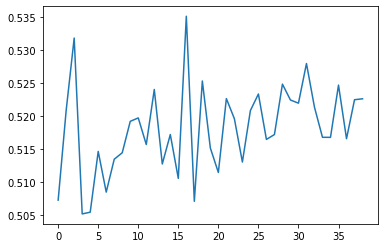

In [217]:
plt.plot(list(map(lambda i: i['accuracy'], knn_scores)))

In [219]:
print('Best k-parametr is', np.argmax(list(map(lambda i: i['accuracy'], knn_scores)))+knn_scores[0]['k'])

Best k-parametr is 17


**Saving knn model**

In [277]:
import pickle

In [275]:
X_, y_ = getNumpyData(balanced=True)

In [276]:
filename_knn = 'knn_model.sav'
filename_scaler = 'scaler_model.sav'

In [278]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_, y_)

KNeighborsClassifier(n_neighbors=17)

In [279]:
print(classification_report(y_, knn.predict(X_)))
print(roc_auc_score(y_, knn.predict(X_)))

              precision    recall  f1-score   support

           0       0.56      0.49      0.52      3297
           1       0.55      0.62      0.58      3297

    accuracy                           0.56      6594
   macro avg       0.56      0.56      0.55      6594
weighted avg       0.56      0.56      0.55      6594

0.5559599636032757


In [259]:
pickle.dump(scaler, open(filename_scaler, 'wb'))
pickle.dump(knn, open(filename_knn, 'wb'))

### Logistic regression

In [260]:
from sklearn.linear_model import LogisticRegression

In [261]:
@cross_validation
def LogReg(train_X, train_Y, test_X, test_Y, metric='accuracy'):
    log_reg = LogisticRegression().fit(train_X, train_Y)
    return ScoreCalculation(log_reg, test_X, test_Y, metric=metric)

In [262]:
LogReg(balanced=True, folds=4, metric='auc')

0.5391798482416094

In [288]:
log_reg = LogisticRegression().fit(X_, y_)
print('Classification Report : ')
print(classification_report(y_, log_reg.predict(X_)))
print('AUC-ROC:',roc_auc_score(y_, log_reg.predict(X_)))

Classification Report : 
              precision    recall  f1-score   support

           0       0.55      0.41      0.47      3297
           1       0.53      0.66      0.58      3297

    accuracy                           0.53      6594
   macro avg       0.54      0.53      0.53      6594
weighted avg       0.54      0.53      0.53      6594

AUC-ROC: 0.5344252350621777


### Random Forest

In [265]:
from sklearn.ensemble import RandomForestClassifier
@cross_validation
def RandomForest(train_X, train_Y, test_X, test_Y, metric='accuracy',estim=50):
    rfc = RandomForestClassifier(n_estimators=estim)
    rfc.fit(train_X, train_Y)
    return ScoreCalculation(rfc, test_X, test_Y, metric=metric)

In [268]:
RandomForest(balanced=True, folds=4, metric='auc')

0.5175834533176934

In [289]:
rfc = RandomForestClassifier(n_estimators=50).fit(X_, y_)

print('Classification Report : ')
print(classification_report(y_, rfc.predict(X_)))
print('AUC-ROC:',roc_auc_score(y_, rfc.predict(X_)))

Classification Report : 
              precision    recall  f1-score   support

           0       0.73      0.61      0.66      3297
           1       0.66      0.77      0.71      3297

    accuracy                           0.69      6594
   macro avg       0.70      0.69      0.69      6594
weighted avg       0.70      0.69      0.69      6594

AUC-ROC: 0.6898695784046102


In [290]:
filename_rfc = 'rfc_model.sav'
pickle.dump(rfc, open(filename_rfc, 'wb'))

### SVM

In [280]:
from sklearn import svm

@cross_validation
def SVM_Classifier(train_X, train_Y, test_X, test_Y, metric='accuracy', kernel='rbf', C=1):
    svm_c = svm.SVC(kernel=kernel, gamma='auto', C=C).fit(train_X, train_Y)
#     print(classification_report(test_Y, svm_c.predict(test_X)))
    return ScoreCalculation(svm_c, test_X, test_Y, metric=metric)

In [287]:
SVM_Classifier(balanced=True, folds=4, C=1, metric='auc')

0.5280494658748219

In [291]:
svm_c = svm.SVC(kernel='rbf', gamma='auto', C=1).fit(X_, y_)

print('Classification Report : ')
print(classification_report(y_, svm_c.predict(X_)))
print('AUC-ROC:',roc_auc_score(y_, svm_c.predict(X_)))

Classification Report : 
              precision    recall  f1-score   support

           0       0.57      0.40      0.47      3297
           1       0.54      0.69      0.60      3297

    accuracy                           0.55      6594
   macro avg       0.55      0.55      0.54      6594
weighted avg       0.55      0.55      0.54      6594

AUC-ROC: 0.5471640885653625
